In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da_us = df[(df['job_title_short']== 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [4]:
df_da_us = df_da_us.explode('job_skills')

In [10]:
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_top_pay = df_da_us_group.sort_values(by='median', ascending=False).head(10)

df_da_skills = df_da_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

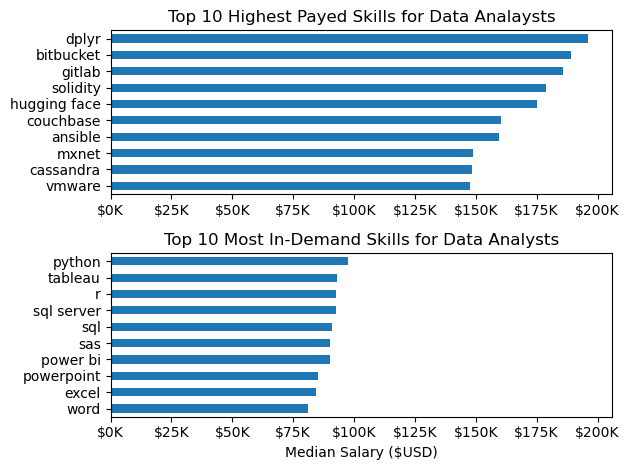

In [17]:
fig, ax = plt.subplots(2, 1)

df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Payed Skills for Data Analaysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()